Aluno: Giovanni Bruno Travassos de Carvalho - 11506849

Resolução da quarta questão da primeira lista de exercícios de Deep Learning

Professor: Tiago Maritan 

## Questão 4
Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo,
até predição de três passos, da série temporal x(n) = sen(n + sen²(n)). Avalie o desempenho
mostrando para cada caso os erros de predição.

Dica: Para auxiliar na resolução desse problema você pode usar K entradas (por exemplo,
K=10), que correspondem a K passos anteriores a n: x(n-1), x(n-2),…, x(n-K), e deve fazer a
predição dos valores x(n+1), x(n+2) e x(n+3).

### Primeira Etapa: Geração de Dados

In [24]:
import math
import random
import numpy as np

random.seed(234) 
    
k = 10


passado = [0] * k
futuro = [0] * 3

entrada = open('entrada.txt', 'w')
saida = open('saida.txt', 'w')

for n in range (0,400):

    for i in range (1,k+1):
        passado[i-1]= math.sin(n-i + pow(math.sin(n-i),2))
        entrada.write(str(passado[i-1]))
        if(i!=k):
            entrada.write(', ')
        else:
            entrada.write('\n')
            
    for i in range(1,4):
        futuro[i-1]= math.sin(n+i + pow(math.sin(n+i),2) )
        saida.write(str(futuro[i-1]))
        if(i!=3):
            saida.write(', ')
        else:
            saida.write('\n')

    passado=[0]*k
    futuro=[0]*3

entrada.close()
saida.close()

In [30]:
# Importando Bibliotecas:
import pandas as pd
import tensorflow as tf
import statistics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from keras.models import Sequential


In [26]:
# Carregando Dados: 

X = []
X = np.loadtxt('entrada.txt', dtype=float, delimiter=',', encoding='bytes')

Y = []
Y = np.loadtxt('saida.txt', dtype=float, delimiter=',', encoding='bytes')

print(X)

[[-0.28779783 -0.92198592 -0.16080628 ... -0.67279849 -0.56019369
   0.27564734]
 [ 0.         -0.28779783 -0.92198592 ... -0.28133335 -0.67279849
  -0.56019369]
 [ 0.99059229  0.         -0.28779783 ...  0.35345162 -0.28133335
  -0.67279849]
 ...
 [ 0.18345135 -0.2816475  -0.79058106 ... -0.27403642 -0.52920736
  -0.77593927]
 [ 0.90956378  0.18345135 -0.2816475  ...  0.58580638 -0.27403642
  -0.52920736]
 [ 0.28637921  0.90956378  0.18345135 ...  0.6559562   0.58580638
  -0.27403642]]


In [27]:
print(Y)

[[ 0.99059229  0.30959858  0.12137777]
 [ 0.30959858  0.12137777 -0.99026631]
 [ 0.12137777 -0.99026631 -0.35568748]
 ...
 [ 0.28637921 -0.01804644 -0.98541502]
 [-0.01804644 -0.98541502 -0.305688  ]
 [-0.98541502 -0.305688   -0.10838341]]


In [28]:
# Divisão dos dados em Treino e Teste: 

X_Treino, X_Teste, Y_Treino, Y_Teste = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [40]:
# Rede Neural: 

rede = Sequential() # Inicialização 
    # Adição de Camadas:
rede.add(Dense(units=5, activation='relu'))
#rede.add(Dropout(0.2))
rede.add(Dense(units=5, activation='relu'))
#rede.add(Dropout(0.2))
rede.add(Dense(units=3, activation='relu'))

In [41]:
# Compilando a Rede: 

rede.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [42]:
# Treinando a Rede: 

redeTreinada = rede.fit(X_Treino, Y_Treino, validation_split = 0.25, epochs = 500, batch_size = 50)

Train on 225 samples, validate on 75 samples
Epoch 1/500
 - 0s - loss: 0.4725 - accuracy: 0.4267 - val_loss: 0.4728 - val_accuracy: 0.5467
Epoch 2/500
 - 0s - loss: 0.4481 - accuracy: 0.4267 - val_loss: 0.4515 - val_accuracy: 0.5467
Epoch 3/500
 - 0s - loss: 0.4274 - accuracy: 0.4267 - val_loss: 0.4328 - val_accuracy: 0.5467
Epoch 4/500
 - 0s - loss: 0.4093 - accuracy: 0.4267 - val_loss: 0.4163 - val_accuracy: 0.5467
Epoch 5/500
 - 0s - loss: 0.3936 - accuracy: 0.4267 - val_loss: 0.4019 - val_accuracy: 0.5467
Epoch 6/500
 - 0s - loss: 0.3803 - accuracy: 0.4267 - val_loss: 0.3892 - val_accuracy: 0.5467
Epoch 7/500
 - 0s - loss: 0.3686 - accuracy: 0.4267 - val_loss: 0.3780 - val_accuracy: 0.5467
Epoch 8/500
 - 0s - loss: 0.3588 - accuracy: 0.4267 - val_loss: 0.3682 - val_accuracy: 0.5467
Epoch 9/500
 - 0s - loss: 0.3500 - accuracy: 0.4267 - val_loss: 0.3597 - val_accuracy: 0.5467
Epoch 10/500
 - 0s - loss: 0.3421 - accuracy: 0.4267 - val_loss: 0.3523 - val_accuracy: 0.5467
Epoch 11/500
 

In [43]:
# Previsão: 

previsao = rede.predict(X_Teste)

In [44]:
# Calculando a Acurácia

acuracia = statistics.mean(redeTreinada.history['accuracy'])
print(acuracia)

0.6801067


In [45]:
# Matriz de Confusão: 

confusao = confusion_matrix(Y_Teste.argmax(axis=1), previsao.argmax(axis=1))
print(confusao)

[[48  0  0]
 [ 4  0 11]
 [17  0 20]]


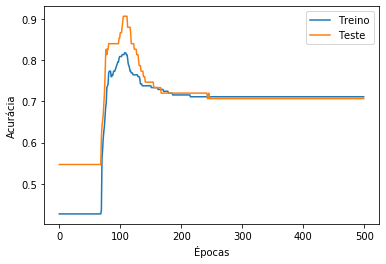

In [46]:
# Gráfico da Acurácia: 

plt.figure(1)
plt.plot(redeTreinada.history['accuracy'])
plt.plot(redeTreinada.history['val_accuracy'])
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Treino', 'Teste'])